# Regularization for linear regression

## Goal

The goal of this lab is to explore the effect of regularization on linear regression for a toy dataset downloaded from Kaggle (the machine learning competition site).

## Get Ames data set and set up

Log into Kaggle and get [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). A useful discussion on this data set is [here](https://nycdatascience.com/blog/student-works/machine-learning-project/).

In [50]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_wine, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Load, extract columns without missing values, one-hot encode categoricals

In [5]:
df_ames = pd.read_csv("ames.csv")
df_ames.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [10]:
# ignore columns with missing values for this exercise
cols_with_missing = df_ames.columns[df_ames.isnull().any()]
cols = set(df_ames.columns) - set(cols_with_missing)

X = df_ames[cols]
X = X.drop('SalePrice', axis=1)
y = df_ames['SalePrice']

X = pd.get_dummies(X) # dummy encode categorical variables
X.shape

(1460, 216)

**1. Split off validation/test set and train unregularized linear regression model**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**2. Compare the R^2 on training and test set**

The model will not generalize at all and so the test set R^2 should be terrible (highly negative).

In [47]:
print(f"{lm.score(X_train, y_train):.2f} R^2 on training set")
print(f"{lm.score(X_test, y_test):.2f} R^2 on test set")

0.93 R^2 on training set
-42666.77 R^2 on test set


**3. Predict $\overline{y}$ computed from training set instead of using the model; what is the R^2? on test set?**

R^2 should give 0 as the neutral value when the prediction is no better and no worse than simply predicting the average of the training set.

In [59]:
y_pred = np.full(shape=(len(y_test),1), fill_value=np.mean(y_train))
r2_score(y_pred, y_test)

0.0

**4. Extract $\beta_0, ..., \beta_p$**

In [36]:
beta = np.hstack([lm.intercept_, lm.coef_])
beta = np.clip(beta,-1e9,1e9) # Clip so we can display

**5. Plot the coefficient index versus the value**

R^2 should give 0 as the neutral value when the prediction is no better and no worse than simply predicting the average of the training set.  The coefficients should look something like:

<img src="ames-ols.png" width="300">

Text(0, 0.5, 'Regression coefficient value\nclipped to 1e9 magnitude')

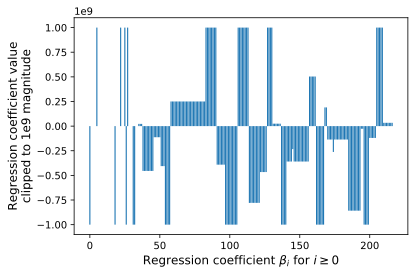

In [63]:
plt.bar(range(len(beta)),beta)
plt.xlabel("Regression coefficient $\\beta_i$ for $i \\geq 0$", fontsize=12)
plt.ylabel("Regression coefficient value\nclipped to 1e9 magnitude", fontsize=12)
#plt.tight_layout(); plt.savefig("ames-ols.png",dpi=150,bbox_inches=0)